In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) =  keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

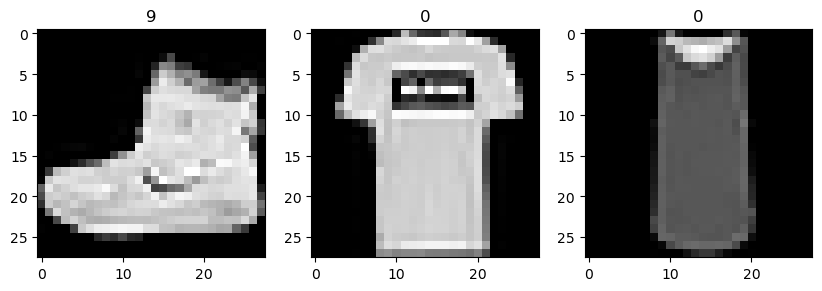

In [19]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, 3, figsize=(10, 10))
for i in range(3):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].set_title(y_train[i])

In [20]:
# Add channel dimension for conv2d
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

number_of_classes = len(set(y_train))
print(f"Number of classes: {number_of_classes}")

Number of classes: 10


In [21]:
data_generator = keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator.fit(x_train)

In [22]:
from keras.layers import Input, Conv2D, Flatten, Dense, Dropout, MaxPooling2D
# from tensorflow.keras.layers import Input, Conv2D, , Flatten, Dense
i = Input(shape=x_train[0].shape) 
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(number_of_classes, activation='softmax')(x)

BATCH_SIZE = 64

In [23]:
from keras.models import Model

# model_1 = Model(inputs=i, outputs=x)
# model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# history = model_1.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=1, batch_size=BATCH_SIZE)

In [24]:
model_1 = Model(inputs=i, outputs=x)
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(data_generator.flow(x_train, y_train), validation_data=(x_test, y_test), 
                      epochs=8, batch_size=BATCH_SIZE, 
                      steps_per_epoch=x_train.shape[0] // BATCH_SIZE * 2) 

Epoch 1/8
1874/1874 [==============================] - 34s 18ms/step - loss: 0.7050 - accuracy: 0.7282 - val_loss: 0.4906 - val_accuracy: 0.8166
Epoch 2/8
1874/1874 [==============================] - 33s 18ms/step - loss: 0.5027 - accuracy: 0.8105 - val_loss: 0.4242 - val_accuracy: 0.8373
Epoch 3/8
1874/1874 [==============================] - 33s 18ms/step - loss: 0.4465 - accuracy: 0.8314 - val_loss: 0.3901 - val_accuracy: 0.8555
Epoch 4/8
1874/1874 [==============================] - 33s 17ms/step - loss: 0.4133 - accuracy: 0.8438 - val_loss: 0.3843 - val_accuracy: 0.8586
Epoch 5/8
1874/1874 [==============================] - 33s 18ms/step - loss: 0.3929 - accuracy: 0.8505 - val_loss: 0.3608 - val_accuracy: 0.8637
Epoch 6/8
1874/1874 [==============================] - 34s 18ms/step - loss: 0.3800 - accuracy: 0.8579 - val_loss: 0.3565 - val_accuracy: 0.8650
Epoch 7/8
1874/1874 [==============================] - 35s 19ms/step - loss: 0.3697 - accuracy: 0.8609 - val_loss: 0.3536 - val_ac

In [25]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                           

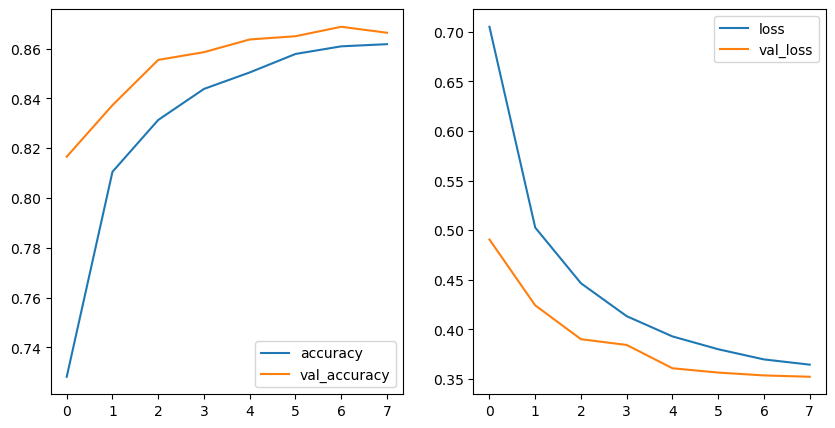

In [26]:
_, axs = plt.subplots(1, 2, figsize=(10, 5))  
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label='val_accuracy')
axs[0].legend()

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label='val_loss')
axs[1].legend()

313/313 [==============================] - 2s 5ms/step
Confusion matrix, without normalization
[[890   1   8  38   4   1  54   0   4   0]
 [  0 979   0  16   0   0   2   0   3   0]
 [ 17   0 790  15  73   0 102   0   3   0]
 [ 17   2   5 930  12   2  28   0   4   0]
 [  1   1 106  65 684   0 138   0   5   0]
 [  0   0   0   0   0 990   0   8   0   2]
 [249   1  70  32  60   1 571   0  16   0]
 [  0   0   0   0   0  75   0 898   0  27]
 [  6   0   3   1   1   5   2   1 980   1]
 [  0   0   0   0   0  14   0  33   1 952]]


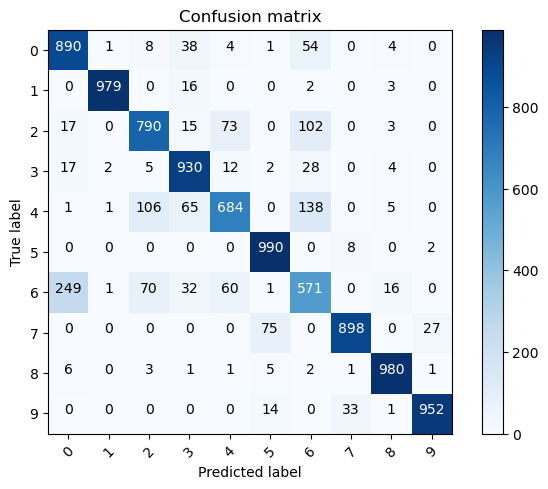

In [27]:
from sklearn.metrics import confusion_matrix
import sys
import os

sys.path.append(os.path.abspath('..'))
from utils import plot_confusion_matrix

p_test = model_1.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(number_of_classes)))
